In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Numpy

In [41]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
y = data[:,2]
M = len(y)
exam_score_1 = data[:,0]
exam_score_2 = data[:,1]
labels = np.array(list(map(lambda student: 'Admitted' if student[2] == 1 else 'Not admitted', data)))

## Logistic regression

### Visualizing the data

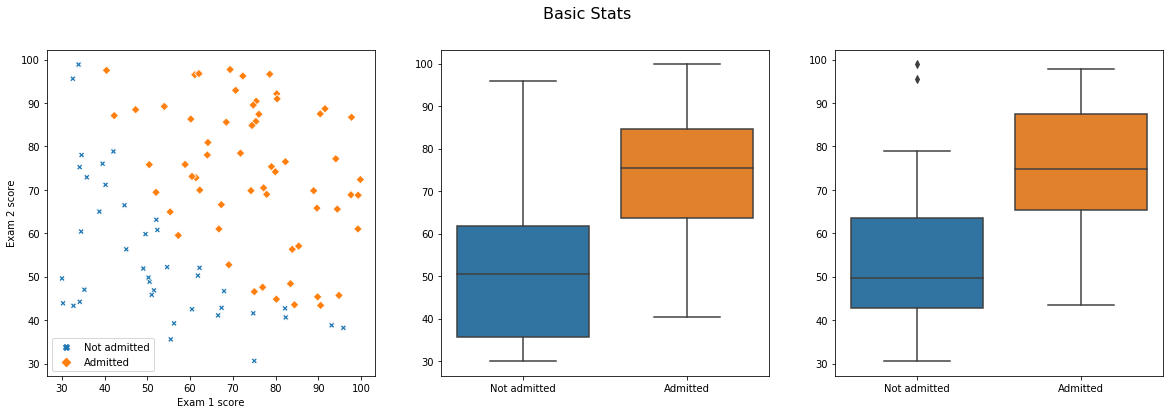

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Basic Stats', fontsize=16)

sns.scatterplot(x=exam_score_1, y=exam_score_2, hue=labels, style=labels, ax=ax1, markers={'Admitted': 'D', 'Not admitted': 'X'})
ax1.set_xlabel('Exam 1 score')
ax1.set_ylabel('Exam 2 score')

sns.boxplot(x=labels, y=exam_score_1, ax=ax2)
sns.boxplot(x=labels, y=exam_score_2, ax=ax3)

plt.show()

### Cost function and gradient

In [4]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

print(f'sigmoid(0) = {sigmoid(0)}')
print(f'sigmoid(-100) = {sigmoid(-1000)}')
print(f'sigmoid(90) = {sigmoid(90)}')

sigmoid(0) = 0.5
sigmoid(-100) = 0.0
sigmoid(90) = 1.0


c:\users\jonathan muñoz\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [5]:
initial_theta = np.zeros(data.shape[1]) # n features + 1

In [6]:
X = np.vstack(([1 for i in range(M)], data[:,0], data[:,1]))

In [7]:
def costFunction(theta, X, y):
    h = sigmoid(theta.T.dot(X))
    J = (-np.log(h).dot(y) - np.log(1-h).dot(1-y))/M
    grad = X.dot((h - y))/M
    return J, grad

In [8]:
J, grad = costFunction(initial_theta, X, y)
J, grad

(0.6931471805599452, array([ -0.1       , -12.00921659, -11.26284221]))

### Cost and test theta

In [9]:
test_theta = np.array([-24., .2, .2])
J_test, grad_test = costFunction(test_theta, X, y)
J_test, grad_test

(0.2183301938265977, array([0.04290299, 2.56623412, 2.64679737]))

### Evaluating logistic regresion

In [10]:
new_student_scores = np.array([1, 45, 85])
predictions = sigmoid(new_student_scores.T.dot(np.array([-25.161, 0.206, 0.201])))
predictions

0.7674556976060447

### Plotting decision boundary

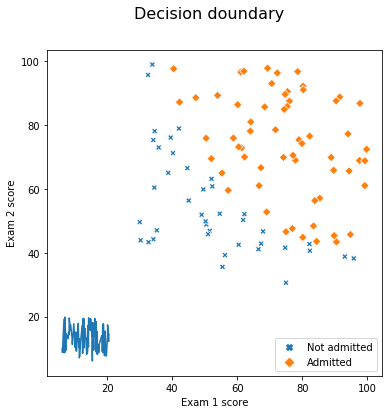

In [11]:
fig, ax1 = plt.subplots(figsize=(6, 6))
fig.suptitle('Decision doundary', fontsize=16)

sns.scatterplot(x=exam_score_1, y=exam_score_2, hue=labels, style=labels, ax=ax1, markers={'Admitted': 'D', 'Not admitted': 'X'})
ax1.set_xlabel('Exam 1 score')
ax1.set_ylabel('Exam 2 score')
sns.lineplot(x=exam_score_1 * 0.206, y=exam_score_2 * 0.201, ax=ax1)

plt.show()

## Regularized logistic regression

In [12]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
m_test1 = data[:,0]
m_test2 = data[:,1]
y = data[:,2]
M = len(y)
labels = np.array(list(map(lambda student: 'Accepted' if student[2] == 1 else 'Rejected', data)))

### Visualizating the data

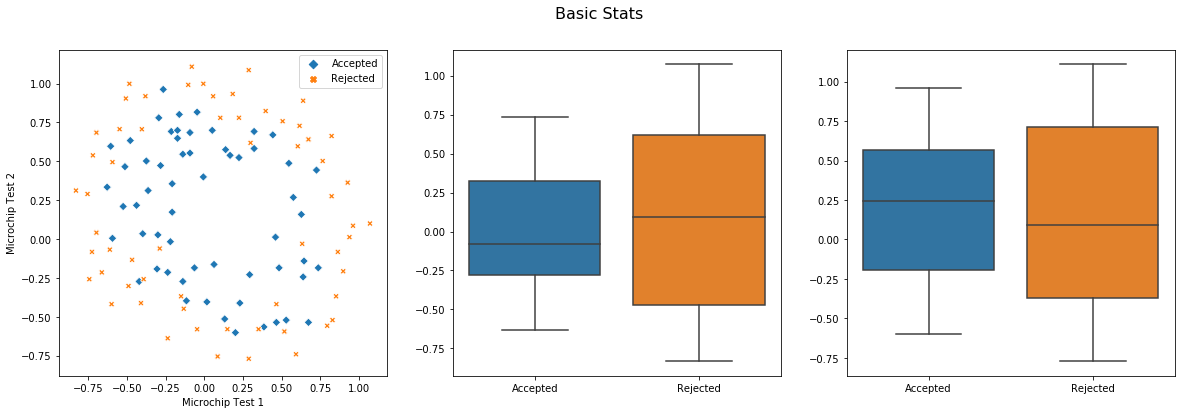

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Basic Stats', fontsize=16)

sns.scatterplot(x=m_test1, y=m_test2, hue=labels, style=labels, ax=ax1, markers={'Accepted': 'D', 'Rejected': 'X'})
ax1.set_xlabel('Microchip Test 1')
ax1.set_ylabel('Microchip Test 2')

sns.boxplot(x=labels, y=m_test1, ax=ax2)
sns.boxplot(x=labels, y=m_test2, ax=ax3)

plt.show()

### Feature mapping

In [14]:
max_degree = 6
alpha = 1

def map_feature(test_1, test_2, M):
    X_T = np.ones(M) 
    
    for i in range(1, max_degree+1):
        for j in range(i+1):
            X_T = np.vstack((X_T, test_1**(i-j) * test_2**j))
            
    return X_T.T

In [15]:
X = map_feature(m_test1, m_test2, M)

### Cost function and gradient

In [16]:
initial_theta = np.zeros(X.shape[1])

In [17]:
def costFunctionReg(theta, X, y, alpha):
    h = sigmoid(X.dot(theta.T))
    J = (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))/M + theta.dot(theta.T)*alpha/(2*M)
    grad = X.T.dot(h - y) + np.array([0 if i == 0 else theta[i] for i in range(len(theta))])*alpha
    return J, grad/M

In [18]:
J, grad = costFunctionReg(initial_theta, X, y, alpha)
J, grad

(0.6931471805599454,
 array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
        1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
        8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
        1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
        4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
        3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
        4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02]))

In [19]:
test_theta = np.ones(X.shape[1])
alpha = 10
J_test, grad_test  = costFunctionReg(test_theta, X, y, alpha)
J_test, grad_test 

(3.2068822129709416,
 array([0.34604507, 0.16135192, 0.19479576, 0.22686278, 0.09218568,
        0.24438558, 0.14339212, 0.10844171, 0.10231439, 0.18346846,
        0.17353003, 0.08725552, 0.11822776, 0.0858433 , 0.19994895,
        0.13522653, 0.09497527, 0.09356441, 0.09979784, 0.09140157,
        0.17485242, 0.14955442, 0.08678566, 0.09897686, 0.08531951,
        0.10190666, 0.08450198, 0.18228323]))

# Pytorch

In [55]:
torch.set_default_dtype(torch.double)

In [56]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
y = torch.tensor(data[:,2])
M = len(y)
exam_score_1 = torch.tensor(data[:,0])
exam_score_2 = torch.tensor(data[:,1])

In [57]:
y.shape

torch.Size([100])

## Cost function and gradient

In [58]:
initial_theta = torch.zeros(1, data.shape[1]) # n features + 1

In [59]:
X = torch.cat((torch.tensor([1. for i in range(M)]), exam_score_1, exam_score_2))
X = torch.reshape(X, (3, M))
X.shape

torch.Size([3, 100])

In [24]:
sigmoid = lambda x: 1. / (1. + torch.exp(-x))

print(f'sigmoid(0) = {sigmoid(torch.tensor([0.])).item()}')
print(f'sigmoid(-100) = {sigmoid(torch.tensor([-100.])).item()}')
print(f'sigmoid(90) = {sigmoid(torch.tensor([90.])).item()}')

sigmoid(0) = 0.5
sigmoid(-100) = 3.7200759760208356e-44
sigmoid(90) = 1.0


In [60]:
def costFunction(theta, X, y):
    y = torch.unsqueeze(y.clone(), 0)
    h = sigmoid(torch.mm(theta, X))
    
    J = -torch.mm(torch.log(h), y.T) - torch.mm(torch.log(1 - h), (1 - y).T)
    grad = torch.mm(X, (h - y).T)
    return J/M, grad/M

In [61]:
J, grad = costFunction(initial_theta, X, y)
J, grad

(tensor([[0.6931]]), tensor([[ -0.1000],
         [-12.0092],
         [-11.2628]]))

In [27]:
test_theta = torch.tensor([[-24., .2, .2]])

In [28]:
J_test, grad_test = costFunction(test_theta, X, y)
J_test, grad_test

(tensor([[0.2183]]), tensor([[0.0429],
         [2.5662],
         [2.6468]]))

## Evaluating logistic regression

In [62]:
sigmoid(torch.mm(torch.tensor([[1., 45.,85.]]), torch.tensor([[-25.161, .206, .201]]).T)).item()

0.7674556976060447

## Regularized logistic regression

In [63]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
m_test1 = torch.tensor(data[:,0])
m_test2 = torch.tensor(data[:,1])
y = torch.tensor(data[:,2])
M = len(y)
torch.unsqueeze(y.clone(), 0).shape

torch.Size([1, 118])

In [64]:
X = torch.tensor(map_feature(m_test1.numpy(), m_test2.numpy(), M))
X.shape

torch.Size([118, 28])

### Cost function and gradient

In [65]:
initial_theta = torch.zeros(1, X.shape[1])
initial_theta

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]])

In [66]:
def costFunctionReg(theta, X, y, alpha):
    y = torch.unsqueeze(y.clone(), 0)
    h = sigmoid(torch.mm(theta, X.T))
    
    J = (-torch.mm(torch.log(h), y.T) - torch.mm(torch.log(1 - h), (1 - y).T))/M + torch.square(theta).sum() * alpha / (2*M)
    grad = torch.mm(X.T, (h - y).T) +  torch.tensor([0 if i == 0 else theta[i] for i in range(len(theta))])*alpha
    return J, grad/M

In [54]:
J, grad = costFunctionReg(initial_theta, X, y, alpha)
J, grad

RuntimeError: size mismatch, m1: [1 x 3], m2: [100 x 1] at C:\w\b\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:41

In [35]:
test_theta = torch.ones(1, X.shape[1])
alpha = 10
J_test, grad_test  = costFunctionReg(test_theta, X, y, alpha)
J_test, grad_test 

(tensor([[3.2069]]), tensor([[ 3.4605e-01],
         [ 7.6606e-02],
         [ 1.1005e-01],
         [ 1.4212e-01],
         [ 7.4399e-03],
         [ 1.5964e-01],
         [ 5.8646e-02],
         [ 2.3696e-02],
         [ 1.7569e-02],
         [ 9.8723e-02],
         [ 8.8784e-02],
         [ 2.5098e-03],
         [ 3.3482e-02],
         [ 1.0975e-03],
         [ 1.1520e-01],
         [ 5.0481e-02],
         [ 1.0230e-02],
         [ 8.8187e-03],
         [ 1.5052e-02],
         [ 6.6558e-03],
         [ 9.0107e-02],
         [ 6.4809e-02],
         [ 2.0399e-03],
         [ 1.4231e-02],
         [ 5.7375e-04],
         [ 1.7161e-02],
         [-2.4378e-04],
         [ 9.7537e-02]]))